#### Nama: Lukman Hakim
#### Kelas: D4RPL3

## Encoding

In [1]:
def encode_message(message):
    encoded_string = ""
    i = 0
    while (i <= len(message)-1):
        count = 1
        ch = message[i]
        j = i
        while (j < len(message)-1):
            if (message[j] == message[j + 1]):
                count = count + 1
                j = j + 1
            else:
                break
        encoded_string = encoded_string + str(count) + ch
        i = j + 1
    return encoded_string

## Decoding

In [2]:
def decode_message(our_message):
        decoded_message = ""
        i=0
        j=0
        while (i <= len(our_message)-1):
            run_count = int(our_message[i])
            run_word = our_message[i + 1]
            for j in range(run_count):
                    decoded_message = decoded_message+run_word
                    j = j + 1
            i = i + 2
        return decoded_message

## Display

In [3]:
def display():
        our_message = "AuuBBBCCCCCCcccccCCCCCCCCCA"
        encoded_message=encode_message(our_message)
        decoded_message=decode_message(encoded_message)
        print("Original string: ["+our_message+"] ["+encoded_message+"]\nDecoded string: ["+decoded_message+"]\n")
display()

Original string: [AuuBBBCCCCCCcccccCCCCCCCCCA] [1A2u3B6C5c9C1A]
Decoded string: [AuuBBBCCCCCCcccccCCCCCCCCCA]



In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Fungsi Basic

In [5]:
def show(img, figsize=(10, 10), title="Image"):
    figure=plt.figure(figsize=figsize)
    
    plt.imshow(img)
    plt.show()
    
def get_size(filename="dd.png"):
    stat = os.stat(filename)
    size=stat.st_size
    return size

## Encoding

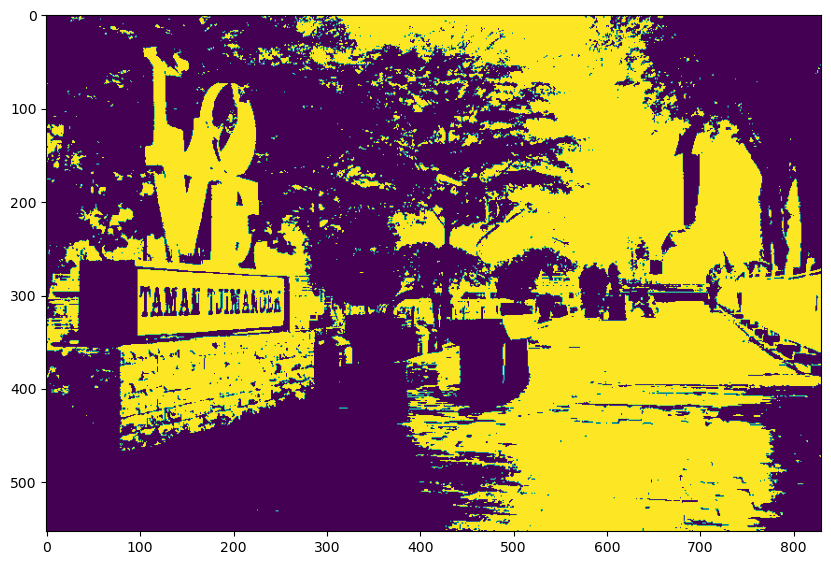

[[  2   0]
 [  2   1]
 [131   0]
 ...
 [  4   0]
 [  4   1]
 [ 61   0]]


In [6]:
def RLE_encoding(img, bits=8, binary=True, view=True):
    """
    img: Grayscale img.
    bits: run length makasimum adalah 2^bits
    """
    if binary:
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
    if view:
        show(img)
        
    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))
    
    return [np.array(encoded), img]


## ujicoba
fpath="taman.bmp"
img = cv2.imread(fpath, 0)
shape=img.shape
[encoded, ori] = RLE_encoding(img, bits=8)
print(encoded)

## Decoding

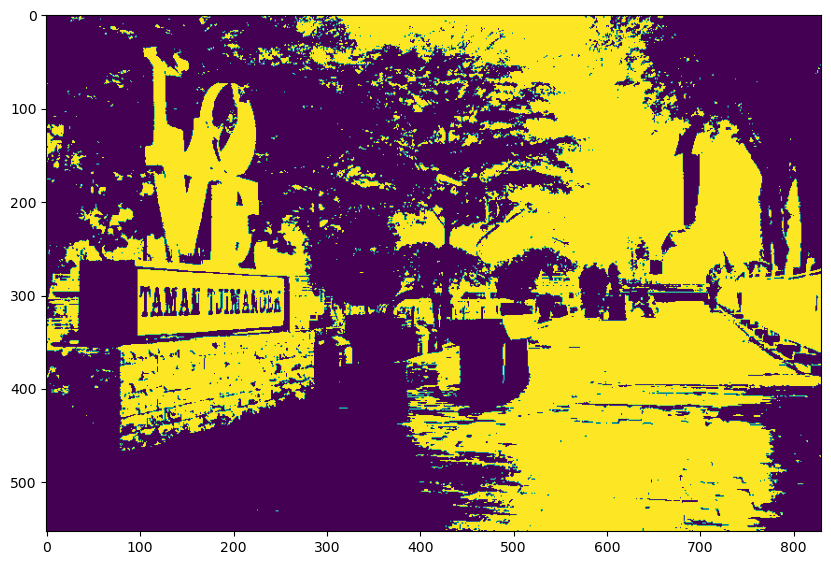

In [7]:
def RLE_decode(encoded, shape):
    decoded=[]
    for rl in encoded:
        r,p = rl[0], rl[1]
        decoded.extend([p]*r)
    dimg = np.array(decoded).reshape(shape)
    return dimg

dimg = RLE_decode(encoded, shape)
show(dimg)

## Hitung Size Kompresi

In [8]:
cv2.imwrite("encoded.tif", encoded)
cv2.imwrite("encoded.png", encoded)
cv2.imwrite("encoded.jpg", encoded)

True

In [9]:
files = ["encoded.png", "encoded.tif", "encoded.jpg",fpath]
for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")

File: encoded.png => Size: 40271 Bytes
File: encoded.tif => Size: 186380 Bytes
File: encoded.jpg => Size: 83911 Bytes
File: taman.bmp => Size: 1836082 Bytes


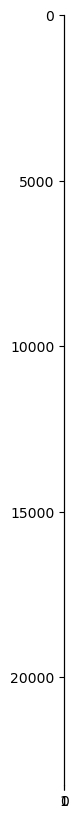

In [10]:
# Display hasil encode RLE
show(encoded)

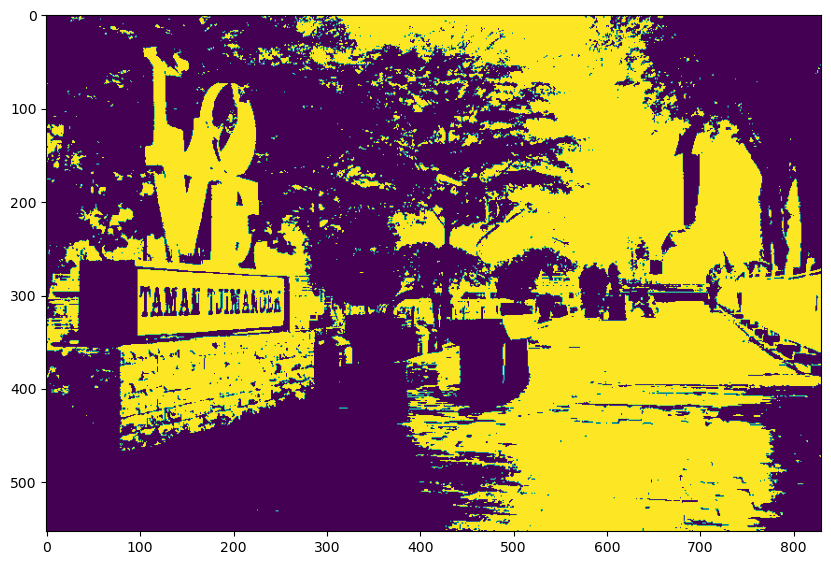

In [11]:
# gambar hasil decode RLE
show(dimg)

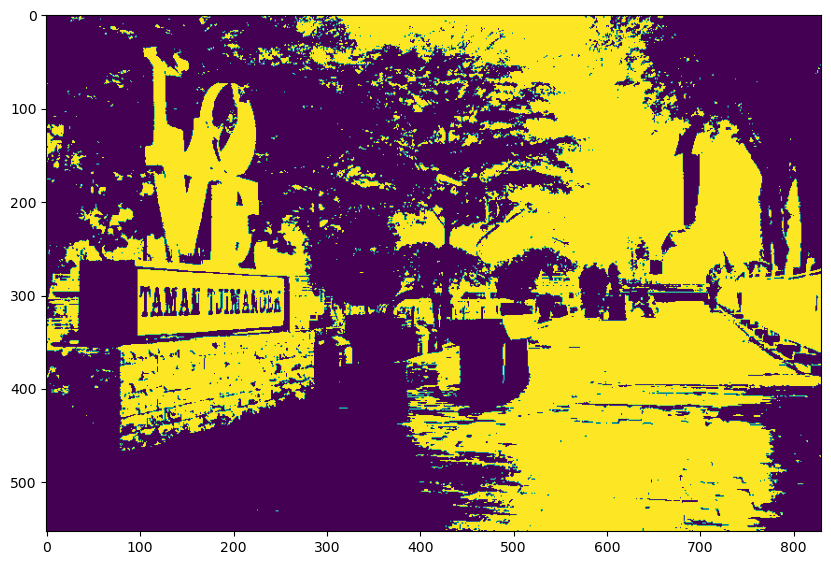

In [12]:
# display gambar asli
show(ori)

## RLE gambar RGB

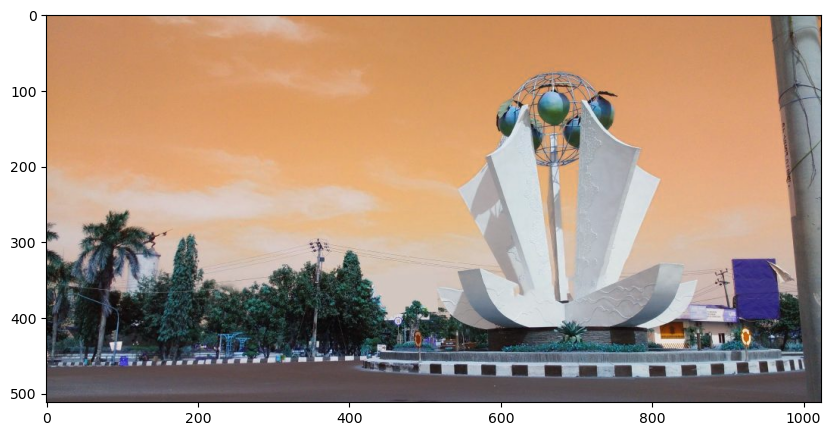

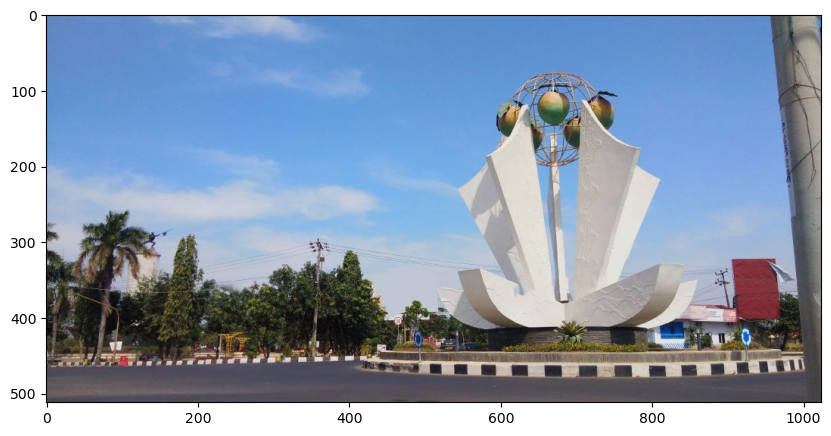

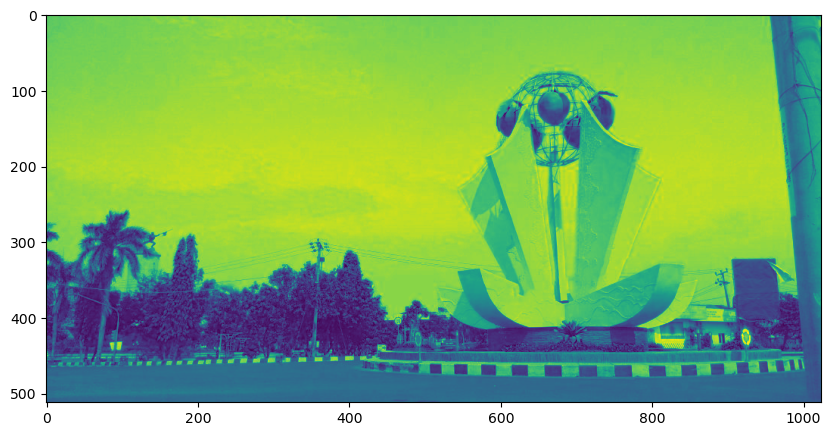

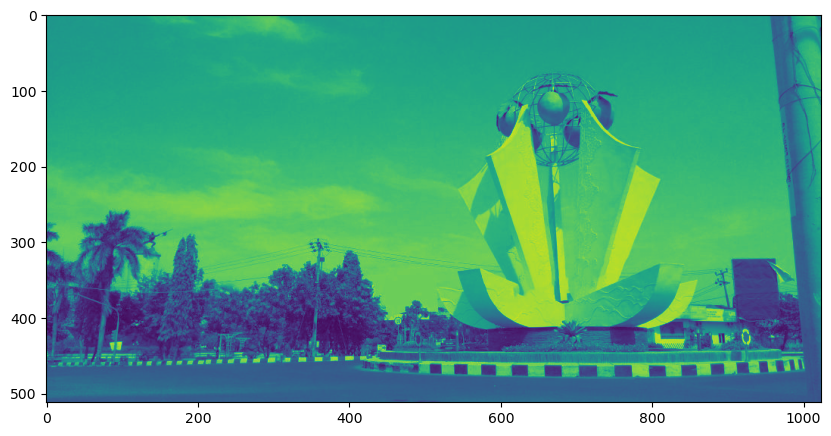

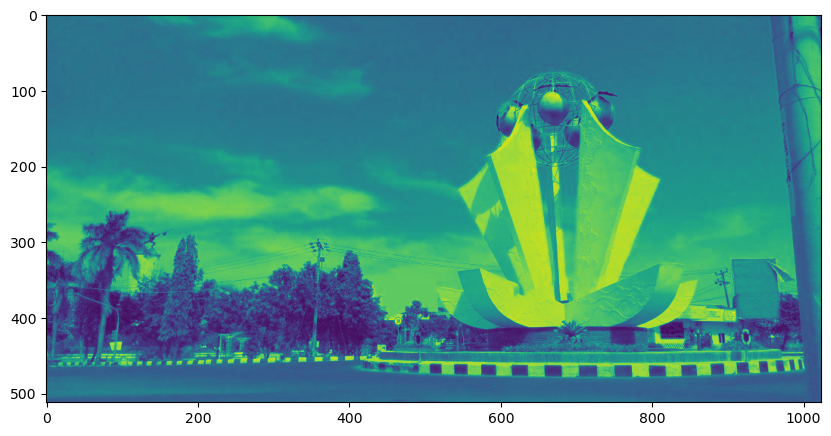

C:\ProgramData\Anaconda3\envs\pcd\lib\site-packages\numpy\lib\npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Original size: 2048.119140625 Byte, TIFF: 7668.099609375 Byte, NPZ: 7662.8203125 Byte


In [13]:
bgr = cv2.imread("mangga.bmp", 1)
show(bgr)

show(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

b, g, r = bgr[:, :, 0], bgr[:, :, 1], bgr[:, :, 2]

[be, imgbe] = RLE_encoding(b, binary=False)
[ge, imgge] = RLE_encoding(g, binary=False)
[re, imgre] = RLE_encoding(r, binary=False)

be.shape, ge.shape, re.shape
np.savez("rgbe.npz", [be, ge, re], dtype=object)
get_size("rgbe.npz")

np.savez("be.npz", be)
np.savez("ge.npz", ge)
np.savez("re.npz", re)

cv2.imwrite("be.tif", be)
cv2.imwrite("ge.tif", ge)
cv2.imwrite("re.tif", re)

files = "bgr"

snp = 0
stif = 0

for f in files:
    ft=""+f+"e"+".npz"
    snp+=get_size(ft)
    
    ft=""+f+"e"+".tif"
    stif+=get_size(ft)
print(f"Original size: {get_size('mangga.bmp')/1024} Byte, TIFF: {stif/1024} Byte, NPZ: {snp/1024} Byte")